In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

!pip install imblearn
from imblearn.over_sampling import ADASYN

In [2]:
# Import recategorised data
wholedata = pd.read_csv("recategorised_data.csv")
wholedata.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection,Entero_level,Wspeed_level,Wdirection_level,on_offshore
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,182.596926,2.052960,4.378617,6.878463,13.310040,187.879028,2.702033,6.703718,0.491324,4.221616,0.073872,1.010412,8.029251,0.869113
std,1271.550681,5.678971,9.307389,12.594966,25.209095,90.915915,1.670540,3.849683,0.500049,4.995729,0.261627,0.106303,4.073803,0.861271
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,113.000000,1.500000,3.500000,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000
50%,10.000000,0.000000,0.490000,1.460000,2.420000,211.000000,2.400000,7.200000,0.000000,2.000000,0.000000,1.000000,9.000000,1.000000
75%,20.000000,0.980000,4.290000,7.730000,15.160000,253.000000,3.400000,10.000000,1.000000,10.000000,0.000000,1.000000,11.000000,2.000000
max,24196.000000,57.900000,115.250000,127.320000,251.620000,360.000000,14.200000,14.100000,1.000000,15.000000,1.000000,2.000000,15.000000,2.000000


In [3]:
wholedata.head()

,DATE,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachName,BeachType,BeachDirection,Entero_level,Wspeed_level,Wdirection_level,on_offshore
0,1995-12-16,10.0,9.17,13.67,37.00,59.84,200,1.5,1.8,Clarks,1,15,0,1,9,0
1,1995-12-27,10.0,0.00,0.00,0.33,0.33,230,5.7,8.5,Clarks,1,15,0,1,10,2
2,1995-12-28,10.0,2.50,2.50,2.50,7.50,320,3.6,11.7,Clarks,1,15,0,1,14,1
3,1996-01-07,10.0,0.00,0.00,0.00,0.00,130,4.1,7.9,Clarks,1,15,0,1,6,0
4,1996-01-08,10.0,0.00,0.00,0.00,0.00,100,3.6,4.4,Clarks,1,15,0,1,4,2


In [4]:
wholedata['DATE']=wholedata['DATE'].astype('datetime64')

In [5]:
# put aside test_set for final test
test_set = wholedata[wholedata['DATE'].dt.year>=2016]
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 190 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              230 non-null    datetime64[ns]
 1   Entero            230 non-null    float64       
 2   Rain24            230 non-null    float64       
 3   Rain48            230 non-null    float64       
 4   Rain72            230 non-null    float64       
 5   RainWA            230 non-null    float64       
 6   Wdirection        230 non-null    int64         
 7   Wspeed            230 non-null    float64       
 8   Solarhours        230 non-null    float64       
 9   BeachName         230 non-null    object        
 10  BeachType         230 non-null    int64         
 11  BeachDirection    230 non-null    int64         
 12  Entero_level      230 non-null    int64         
 13  Wspeed_level      230 non-null    int64         
 14  Wdirection_level  230 n

In [6]:
# train/validation set excluding test_set
data_frame = wholedata[wholedata['DATE'].dt.year<2016]
data_frame = data_frame.sort_values(by=['DATE'])
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 0 to 1151
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              1787 non-null   datetime64[ns]
 1   Entero            1787 non-null   float64       
 2   Rain24            1787 non-null   float64       
 3   Rain48            1787 non-null   float64       
 4   Rain72            1787 non-null   float64       
 5   RainWA            1787 non-null   float64       
 6   Wdirection        1787 non-null   int64         
 7   Wspeed            1787 non-null   float64       
 8   Solarhours        1787 non-null   float64       
 9   BeachName         1787 non-null   object        
 10  BeachType         1787 non-null   int64         
 11  BeachDirection    1787 non-null   int64         
 12  Entero_level      1787 non-null   int64         
 13  Wspeed_level      1787 non-null   int64         
 14  Wdirection_level  1787 n

In [7]:
###KNN with original unbalanced dataset
print("KNN model with original unbalanced dataset----")
print("input data -", end =" ")
input_data = data_frame.iloc[:,2:9]
print(input_data.columns.values)
entero_data = data_frame.iloc[:,12]

# Split the data randomly - 70% train set, 30% test set
trainset_data, testset_data, trainset_labels, testset_labels = train_test_split(input_data, entero_data, test_size=0.3, random_state=42)

# Train data normalization
sc = preprocessing.StandardScaler()
trainset_data = sc.fit_transform(trainset_data)
testset_data = sc.transform(testset_data)

# Run KNN with sklearn
knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
knn.fit(trainset_data, trainset_labels)

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(accuracy_score(testset_labels,knn.predict(testset_data)))
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))

KNN model with original unbalanced dataset----
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours']
Predictions from the knn classifier:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

KNN (n=5) model with ADASYN (n=10) balanced data----
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours']
Predictions from the knn classifier:
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 1]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

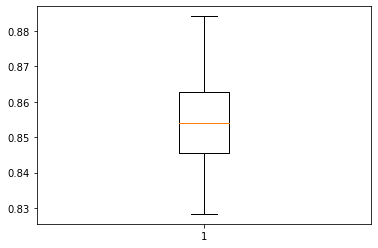

In [8]:
### KNN with ADASYN balanced data
print("KNN (n=5) model with ADASYN (n=10) balanced data----")
print("input data -", end =" ")
print(input_data.columns.values)
# Separate real above and real below data
index_above = (data_frame['Entero_level']==1)
index_below = (data_frame['Entero_level']==0)
input_real_above_data = data_frame[index_above]
input_real_below_data = data_frame[index_below]

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
water_above_label = input_real_above_data.iloc[:,12]

# Calculate ratio for train/test for real below data
len_testset = len(input_real_above_data)
ratio = round(len_testset/len(input_real_below_data),2)

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24', 'Rain48','Rain72','RainWA','Wdirection','Wspeed','Solarhours'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:7]
    water_fake_label = data_fake_frame.iloc[:,7]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=10) balanced data plus additional parameter 'BeachType'----
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType']
Predictions from the knn classifier:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1
 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 1]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

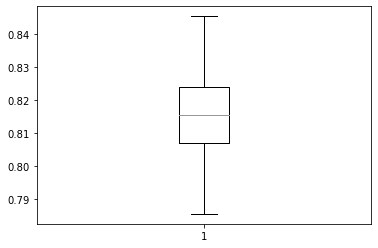

In [9]:
### KNN with balanced data with additional parameter 'BeachType'
print("KNN (n=5) model with ADASYN (n=10) balanced data plus additional parameter 'BeachType'----")
input_data = data_frame.iloc[:,2:11].drop(columns=['BeachName'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:11].drop(columns=['BeachName'])

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24', 'Rain48','Rain72','RainWA','Wdirection','Wspeed','Solarhours','BeachType'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:8]
    water_fake_label = data_fake_frame.iloc[:,8]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:11].drop(columns=['BeachName'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=10) balanced data plus additional parameter 'on_offshore'----
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'on_offshore']
Predictions from the knn classifier:
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

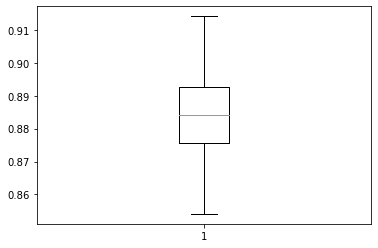

In [10]:
### KNN with balanced data with additional parameter 'on_offshore'
print("KNN (n=5) model with ADASYN (n=10) balanced data plus additional parameter 'on_offshore'----")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24', 'Rain48','Rain72','RainWA','Wdirection','Wspeed','Solarhours','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:8]
    water_fake_label = data_fake_frame.iloc[:,8]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=10) balanced data - replaced 'Wdirection' with 'on_offshore'
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'on_offshore']
Predictions from the knn classifier:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

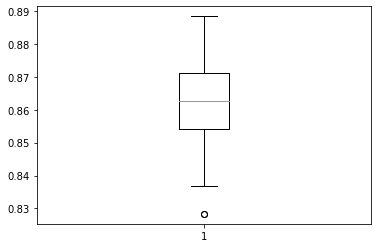

In [11]:
### KNN with balanced data - replaced 'Wdirection' with 'on_offshore'
print("KNN (n=5) model with ADASYN (n=10) balanced data - replaced 'Wdirection' with 'on_offshore'")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
input_data = input_data.drop(columns=['Wdirection'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']
testset_above_data = testset_above_data.drop(columns=['Wdirection'])

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24', 'Rain48','Rain72','RainWA','Wspeed','Solarhours','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:7]
    water_fake_label = data_fake_frame.iloc[:,7]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    input_real_data = input_real_data.drop(columns=['Wdirection'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore', replaced 'Wspeed' with 'Wspeed_level'----
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Solarhours'
 'Wspeed_level' 'on_offshore']
Predictions from the knn classifier:
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0

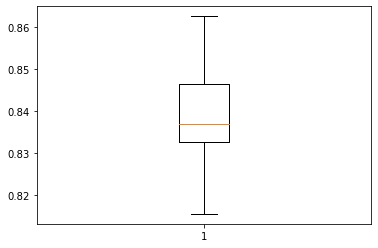

In [13]:
### KNN with balanced data - add 'on_offshore', and replace 'Wspeed' with 'Wspeed_level' 
print("KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore', replaced 'Wspeed' with 'Wspeed_level'----")
input_data = data_frame.iloc[:,2:9]
input_data[['Wspeed_level','on_offshore']] = data_frame[['Wspeed_level','on_offshore']]
input_data = input_data.drop(columns=['Wspeed'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data[['Wspeed_level','on_offshore']] = input_real_above_data[['Wspeed_level','on_offshore']]
testset_above_data = testset_above_data.drop(columns=['Wspeed'])

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24', 'Rain48','Rain72','RainWA','Wdirection','Solarhours','Wspeed_level','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:8]
    water_fake_label = data_fake_frame.iloc[:,8]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data[['Wspeed_level','on_offshore']] = input_real_below_data[['Wspeed_level','on_offshore']]
    input_real_data = input_real_data.drop(columns=['Wspeed'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=5) balanced data - add 'on_offshore'
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'on_offshore']
Predictions from the knn classifier:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

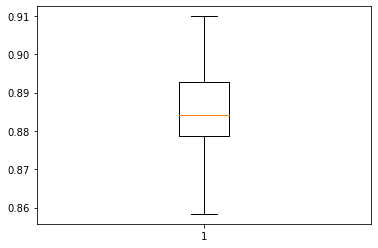

In [14]:
### KNN with balanced data - add 'on_offshore'
print("KNN (n=5) model with ADASYN (n=5) balanced data - add 'on_offshore'")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
#input_data = input_data.drop(columns=['Wdirection'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']
#testset_above_data = testset_above_data.drop(columns=['Wdirection'])

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=5)

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24', 'Rain48','Rain72','RainWA','Wdirection','Wspeed','Solarhours','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:8]
    water_fake_label = data_fake_frame.iloc[:,8]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    #input_real_data = input_real_data.drop(columns=['Wdirection'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=20) balanced data - add 'on_offshore'
Predictions form the knn classifier:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

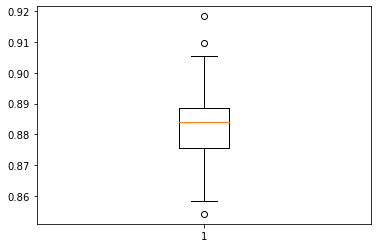

In [15]:
### KNN with balanced data - add 'on_offshore' 
print("KNN (n=5) model with ADASYN (n=20) balanced data - add 'on_offshore'")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
#input_data = input_data.drop(columns=['Wdirection'])

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']
#testset_above_data = testset_above_data.drop(columns=['Wdirection'])

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=20)

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24', 'Rain48','Rain72','RainWA','Wdirection','Wspeed','Solarhours','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:8]
    water_fake_label = data_fake_frame.iloc[:,8]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    #input_real_data = input_real_data.drop(columns=['Wdirection'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions form the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'RainWA'
input data - ['Rain24' 'Rain48' 'Rain72' 'Wdirection' 'Wspeed' 'Solarhours'
 'on_offshore']
Predictions from the knn classifier:
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

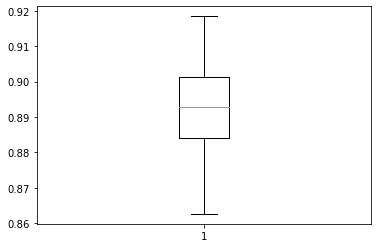

In [16]:
### KNN with balanced data - add 'on_offshore' plus removed 'RainWA' 
print("KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'RainWA'")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
input_data = input_data.drop(columns=['RainWA'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']
testset_above_data = testset_above_data.drop(columns=['RainWA'])

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24', 'Rain48','Rain72','Wdirection','Wspeed','Solarhours','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:7]
    water_fake_label = data_fake_frame.iloc[:,7]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    input_real_data = input_real_data.drop(columns=['RainWA'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Rain24'
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'on_offshore']
Predictions from the knn classifier:
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

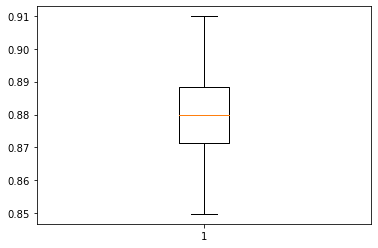

In [17]:
### KNN with balanced data - add 'on_offshore' plus removed 'Rain24'
print("KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Rain24'")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
input_data = input_data.drop(columns=['Rain24'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']
testset_above_data = testset_above_data.drop(columns=['Rain24'])

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain48','Rain72','RainWA', 'Wdirection','Wspeed','Solarhours','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:7]
    water_fake_label = data_fake_frame.iloc[:,7]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    input_real_data = input_real_data.drop(columns=['Rain24'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Rain48'
input data - ['Rain24' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'on_offshore']
Predictions from the knn classifier:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

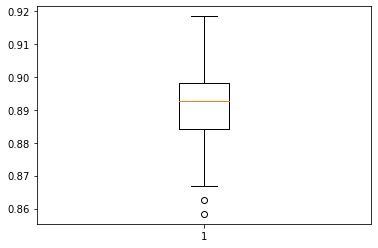

In [18]:
### KNN with balanced data - add 'on_offshore' plus removed 'Rain48' 
print("KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Rain48'")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
input_data = input_data.drop(columns=['Rain48'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']
testset_above_data = testset_above_data.drop(columns=['Rain48'])

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24','Rain72','RainWA', 'Wdirection','Wspeed','Solarhours','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:7]
    water_fake_label = data_fake_frame.iloc[:,7]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    input_real_data = input_real_data.drop(columns=['Rain48'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Rain72'
input data - ['Rain24' 'Rain48' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'on_offshore']
Predictions from the knn classifier:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

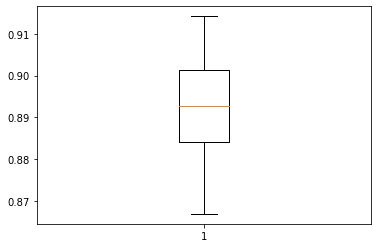

In [19]:
### KNN with balanced data - add 'on_offshore' plus removed 'Rain72'
print("KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Rain72'")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
input_data = input_data.drop(columns=['Rain72'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']
testset_above_data = testset_above_data.drop(columns=['Rain72'])

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24','Rain48','RainWA', 'Wdirection','Wspeed','Solarhours','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:7]
    water_fake_label = data_fake_frame.iloc[:,7]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    input_real_data = input_real_data.drop(columns=['Rain72'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Solarhours'
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'on_offshore']
Predictions from the knn classifier:
[1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 1 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

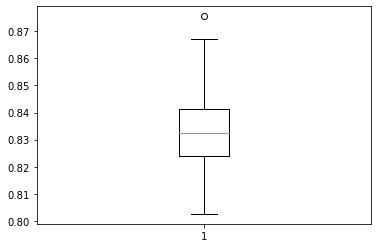

In [20]:
### KNN with balanced data - add 'on_offshore' plus removed 'Solarhours'
print("KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Solarhours'")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
input_data = input_data.drop(columns=['Solarhours'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']
testset_above_data = testset_above_data.drop(columns=['Solarhours'])

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24','Rain48','Rain72','RainWA', 'Wdirection','Wspeed','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:7]
    water_fake_label = data_fake_frame.iloc[:,7]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    input_real_data = input_real_data.drop(columns=['Solarhours'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=9) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Rain48' and 'RainWA'
input data - ['Rain24' 'Rain72' 'Wdirection' 'Wspeed' 'Solarhours' 'on_offshore']
Predictions from the knn classifier:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

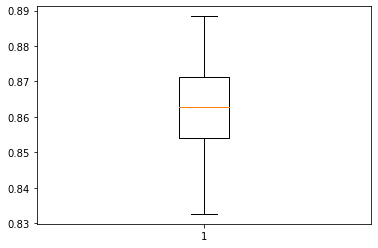

In [23]:
### KNN with balanced data - add 'on_offshore' plus removed 'Rain48' and 'RainWA'
print("KNN (n=9) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Rain48' and 'RainWA'")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
input_data = input_data.drop(columns=['Rain48','RainWA'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']
testset_above_data = testset_above_data.drop(columns=['Rain48','RainWA'])

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24','Rain72','Wdirection','Wspeed','Solarhours','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:6]
    water_fake_label = data_fake_frame.iloc[:,6]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    input_real_data = input_real_data.drop(columns=['Rain48','RainWA'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=9,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Rain48' and 'RainWA'
input data - ['Rain24' 'Rain72' 'Wdirection' 'Wspeed' 'Solarhours' 'on_offshore']
Predictions from the knn classifier:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0]
Target values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

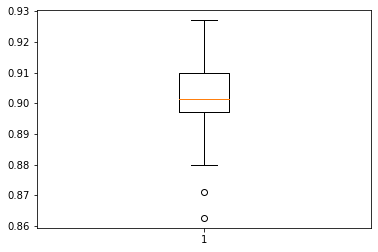

In [24]:
### KNN with balanced data - add 'on_offshore' plus removed 'Rain48' and 'RainWA'-best model so far
print("KNN (n=5) model with ADASYN (n=10) balanced data - add 'on_offshore' plus removed 'Rain48' and 'RainWA'")
input_data = data_frame.iloc[:,2:9]
input_data['on_offshore'] = data_frame['on_offshore']
input_data = input_data.drop(columns=['Rain48','RainWA'])
print("input data -", end =" ")
print(input_data.columns.values)

# Use real above data form testset above data
testset_above_data = input_real_above_data.iloc[:,2:9]
testset_above_data['on_offshore'] = input_real_above_data['on_offshore']
testset_above_data = testset_above_data.drop(columns=['Rain48','RainWA'])

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=['Rain24','Rain72','Wdirection','Wspeed','Solarhours','on_offshore'])
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:6]
    water_fake_label = data_fake_frame.iloc[:,6]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.iloc[:,2:9]
    input_real_data['on_offshore'] = input_real_below_data['on_offshore']
    input_real_data = input_real_data.drop(columns=['Rain48','RainWA'])
    entero_real_data = input_real_below_data.iloc[:,12]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    trainset_data = sc.fit_transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    i=i+1

#End of loop

# Show the KNN result
print("Predictions from the knn classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)
print("Overall accuracy:")
print(j.mean())
print("Confusion matrix")
print(confusion_matrix(testset_labels,knn.predict(testset_data)))
plt.boxplot(j)
plt.show()

In [27]:
# Final model test on separate test-set
data_set = test_set.iloc[:,2:9]
data_set[['on_offshore','Entero_level']] = test_set[['on_offshore','Entero_level']]
data_set = data_set.drop(columns=['Rain48', 'RainWA'])
test_set_data = data_set.iloc[:,0:6]
test_set_labels = data_set.iloc[:,6]

print("Overall accuracy:")
print(accuracy_score(test_set_labels,knn.predict(test_set_data)))
print("Confusion matrix")
print(confusion_matrix(test_set_labels,knn.predict(test_set_data)))

Overall accuracy:
0.6739130434782609
Confusion matrix
[[138  58]
 [ 17  17]]
